In [2]:
import matplotlib.pyplot as plt
import csv
import statistics as stats
import json
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams.update({'font.size': 22})

In [3]:
containers = ["bm", "docker", "podman", "singularity"]
suites = ["cloud"]
tests = set()
results = {}

In [4]:
for container in containers:
    results[container] = {}
    for suite in suites:
        results[container][suite] = {}
        with open(container + "_" + suite + ".csv", "r") as csvfile:
            rows = csv.reader(csvfile, delimiter=',')
            for row in rows:
                test = row[0]
                htr = row[1]
                score = float(row[2])
                results[container][suite][test] = {"htr": htr, "score": score}
                tests.add(test)

print("Tests: " + str(tests))
print("Results: " + json.dumps(results, indent=2))

Tests: {'SQLite - Threads / Copies: 32', 'Redis - Test: SET', 'SQLite - Threads / Copies: 1', 'Redis - Test: GET', 'PyBench - Total For Average Test Times', 'OpenSSL - RSA 4096-bit Performance', 'Apache Benchmark - Static Web Page Serving', 'NGINX Benchmark - Static Web Page Serving'}
Results: {
  "bm": {
    "cloud": {
      "SQLite - Threads / Copies: 1": {
        "htr": "LIB",
        "score": 87.21
      },
      "SQLite - Threads / Copies: 32": {
        "htr": "LIB",
        "score": 504.622
      },
      "OpenSSL - RSA 4096-bit Performance": {
        "htr": "HIB",
        "score": 1190.4
      },
      "Redis - Test: GET": {
        "htr": "HIB",
        "score": 2128863.04
      },
      "Redis - Test: SET": {
        "htr": "HIB",
        "score": 1518247.46
      },
      "PyBench - Total For Average Test Times": {
        "htr": "LIB",
        "score": 1188.0
      },
      "NGINX Benchmark - Static Web Page Serving": {
        "htr": "HIB",
        "score": 23478.19
    

SQLite - Threads / Copies: 32
504.622
537.154
524.572
528.009


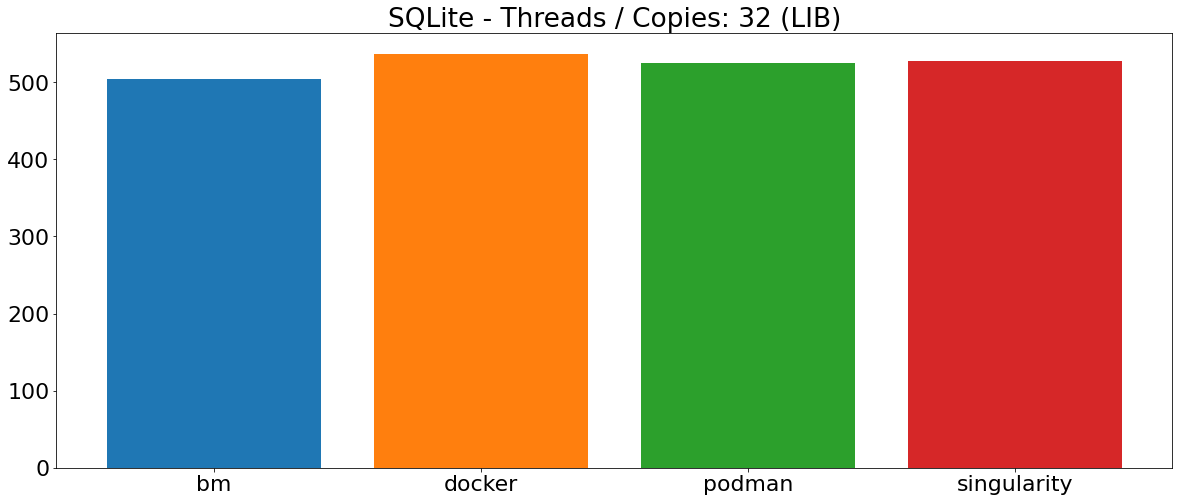

Redis - Test: SET
1518247.46
1612758.83
1583815.98
1574852.38


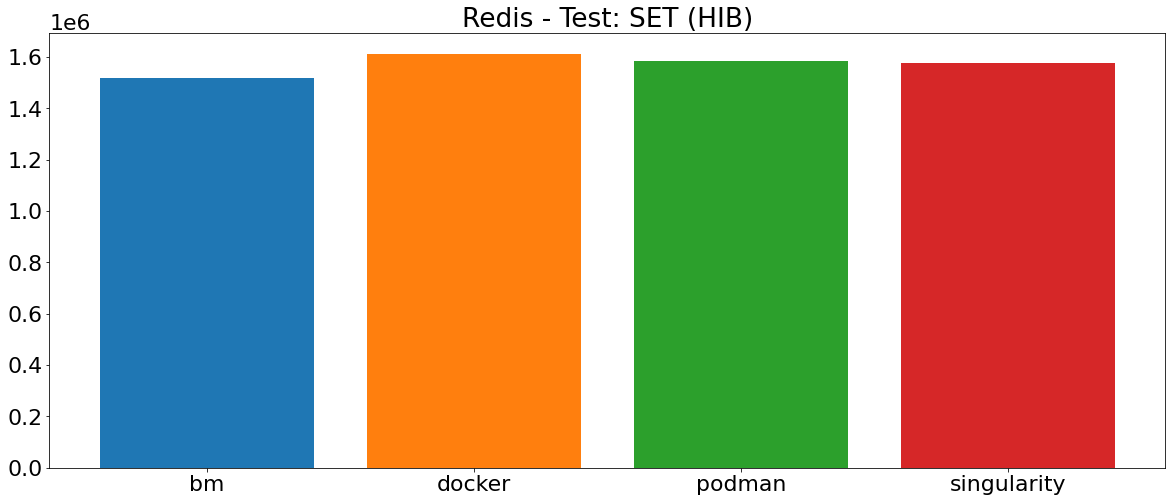

SQLite - Threads / Copies: 1
87.21
85.938
87.682
88.179


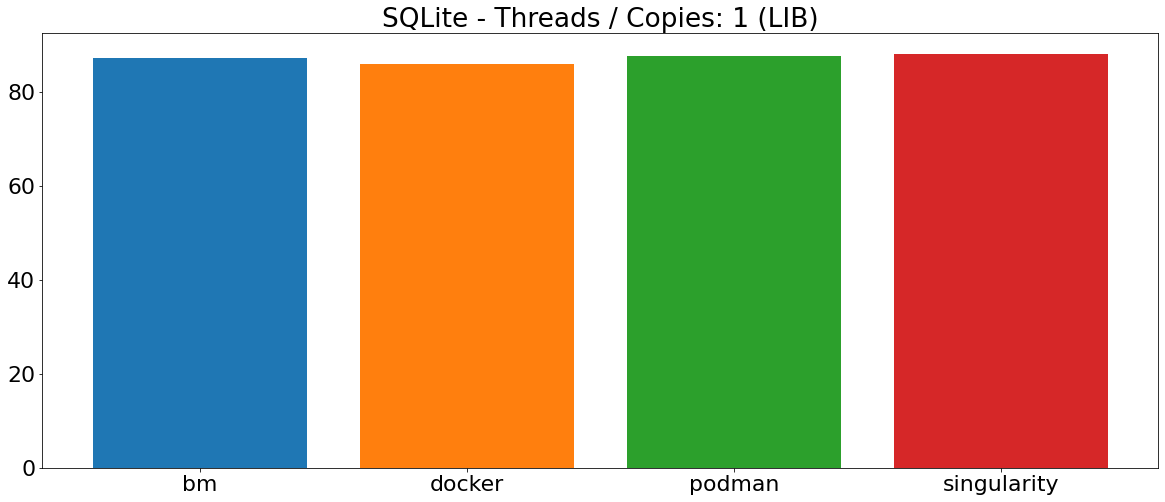

Redis - Test: GET
2128863.04
2172653.5
2249036.42
2195158.75


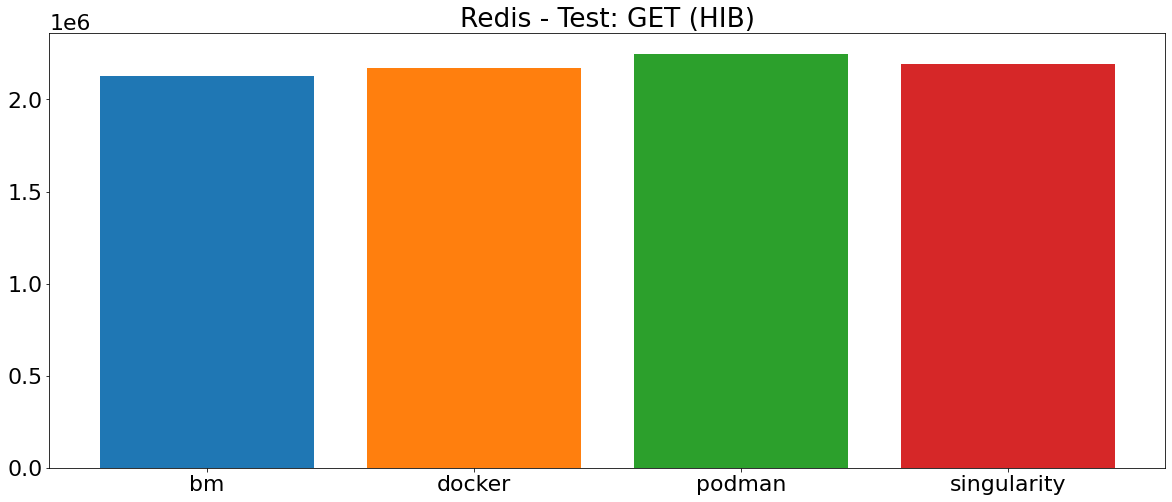

PyBench - Total For Average Test Times
1188.0
1797.0
1798.0
1270.0


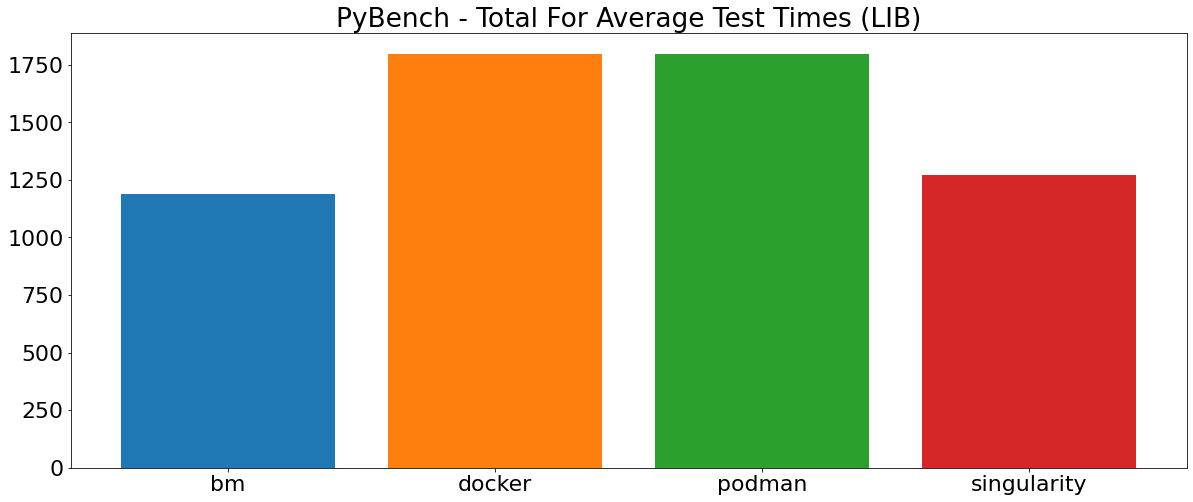

OpenSSL - RSA 4096-bit Performance
1190.4
1191.5
1188.7
1188.6


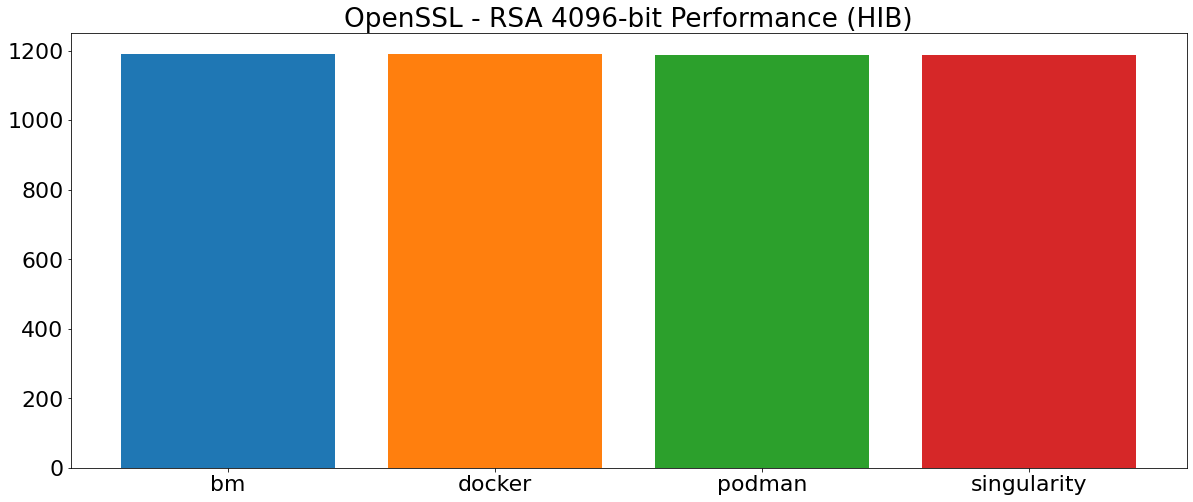

Apache Benchmark - Static Web Page Serving
20264.81
23321.11
23942.04
20369.79


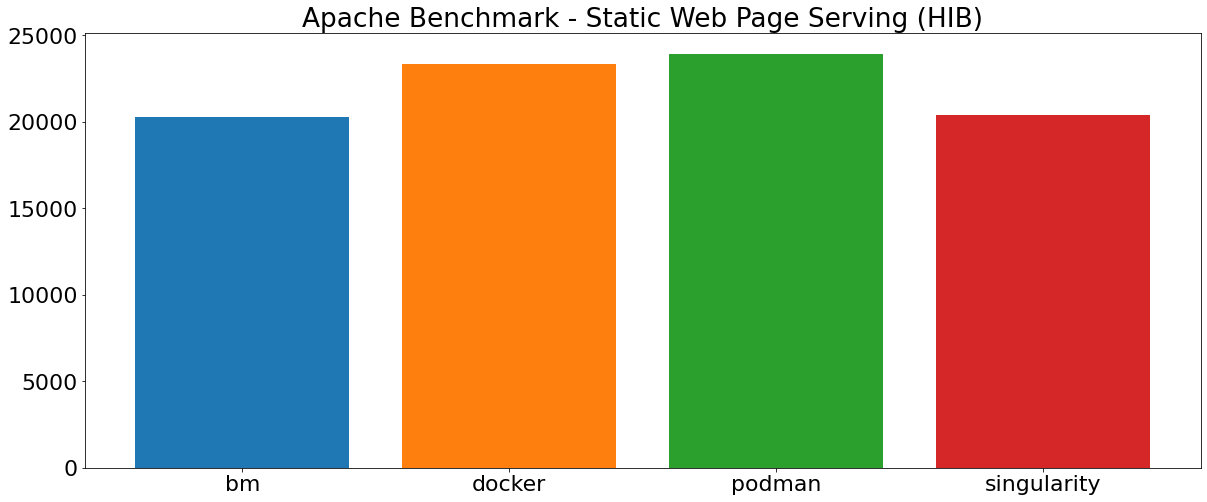

NGINX Benchmark - Static Web Page Serving
23478.19
21104.07
28953.07
23373.08


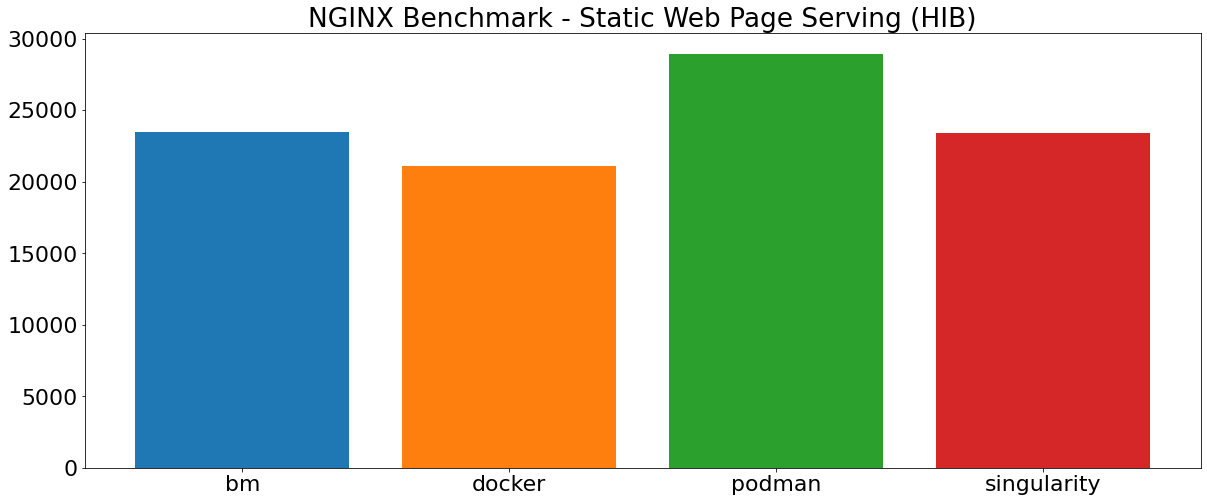

In [5]:
for suite in suites:
    for test in tests:
        print(test)
        for i,container in enumerate(containers):
            print(results[container][suite][test]["score"])
            pl = plt.bar(i, results[container][suite][test]["score"])
            
        index = [i for i in range(len(containers))]
        plt.title(test + ' (' + results[container][suite][test]["htr"] + ')')
        plt.xticks(index, containers)
        plt.show()